In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer


In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [4]:
df.tail()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

In [5]:
df.sample(10)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
160         161  Female   56                  79                      35
76           77  Female   45                  54                      53
139         140  Female   35                  74                      72
40           41  Female   65                  38                      35
58           59  Female   27                  46                      51
110         111    Male   65                  63                      52
102         103    Male   67                  62                      59
195         196  Female   35                 120                      79
104         105    Male   49                  62                      56
24           25  Female   54                  28                      14

In [6]:
print("Data Analysis")
df.columns

Data Analysis


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [8]:

df.shape

(200, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Count plot for gender


<AxesSubplot:xlabel='Gender', ylabel='count'>

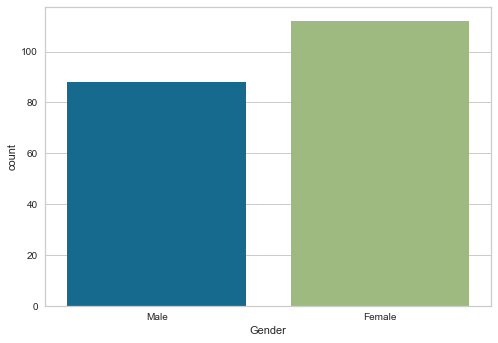

In [11]:
print("Count plot for gender")
sns.countplot(df['Gender'])

Female    112
Male       88
Name: Gender, dtype: int64

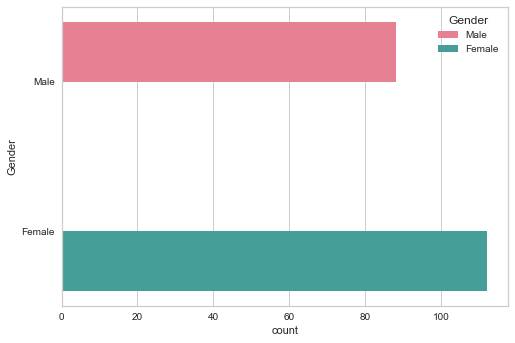

In [12]:
sns.countplot(y = 'Gender', data = df, palette="husl", hue = "Gender")
df["Gender"].value_counts()

In [14]:
print("Plotting the Relation between Age, Annual Income and Spending Score")
x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

Plotting the Relation between Age, Annual Income and Spending Score


In [15]:
sns.pairplot(df, vars=["Age", "Annual Income (k$)", "Spending Score (1-100)"],  kind ="reg",
             palette="husl")

In [16]:
print("Distribution of values in Age, Annual Income and Spending Score according to Gender")
sns.pairplot(df, vars=["Age", "Annual Income (k$)", "Spending Score (1-100)"],  kind ="reg", hue = "Gender", palette="husl", markers = ['o','D'])

Distribution of values in Age, Annual Income and Spending Score according to Gender


In [17]:
print("Clustering using K-means: Segmentation using Age and Spending Score")

sns.lmplot(x = "Age", y = "Spending Score (1-100)", data = df, hue = "Gender")

Clustering using K-means: Segmentation using Age and Spending Score


In [18]:
print("Clustering using K-means: Segmentation using Annual Income and Spending Score")
sns.lmplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = df, hue = "Gender")

Clustering using K-means: Segmentation using Annual Income and Spending Score


In [19]:
print("Clustering using K-Means: Segmentation using Age, Annual Income and Spending Score")

sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", size="Age", data=df);

Clustering using K-Means: Segmentation using Age, Annual Income and Spending Score


Selection of Clusters


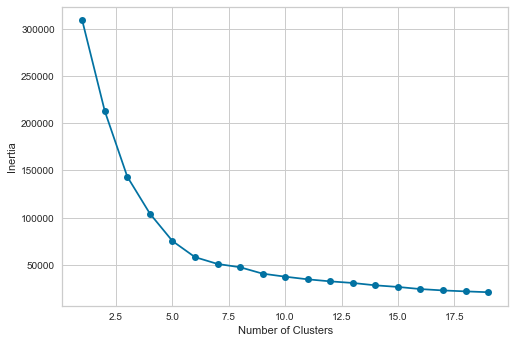

In [24]:
print("Selection of Clusters")
X = df.loc[:,["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
inertia = []
k = range(1,20)
for i in k:
    means_k = KMeans(n_clusters=i, random_state=0)
    means_k.fit(X)
    inertia.append(means_k.inertia_)
plt.plot(k , inertia , 'bo-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()


In [28]:
print("3D Plot of Clusters")
means_k = KMeans(n_clusters=5, random_state=0)
means_k.fit(X)
labels = means_k.labels_
centroids = means_k.cluster_centers_

3D Plot of Clusters


In [27]:
trace1 = go.Scatter3d(
    x= X['Spending Score (1-100)'],
    y= X['Annual Income (k$)'],
    z= X['Age'],
    mode='markers',
     marker=dict(
        color = labels, 
        size= 10,
        line=dict(
            color= labels,
        ),
        opacity = 0.9
     )
)
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Spending_score'),
            yaxis = dict(title  = 'Annual_income'),
            zaxis = dict(title  = 'Age')
        )
)
fig = go.Figure(data=trace1, layout=layout)
py.offline.iplot(fig)